In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset (change this path to your file path)
url = '/content/Loan_default.csv'  # Replace with actual file path
df = pd.read_csv(url)

# Display the first few rows of the dataset
df.head()


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [2]:
# Get information about the dataset (data types, missing values)
print(df.info())

# Check statistical summary of numerical columns
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

**2. Data Handling: Handling Missing Data**

Missing values can significantly affect the model's performance. We will impute the missing values with the mean or median of the respective columns.

In [3]:
# Checking for missing values in the dataset
missing_data = df.isnull().sum()
print(missing_data)

# Select only numerical features for imputation
numerical_features = df.select_dtypes(include=np.number).columns

# Impute missing values with the mean (for numerical columns only)
imputer = SimpleImputer(strategy='mean')
df[numerical_features] = imputer.fit_transform(df[numerical_features])

# Check again for missing values after imputation
print(df.isnull().sum())

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64
LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64


In [4]:
#Data Handling & Preprocessing:

# Check for missing values
df.isnull().sum()

# Dropping rows with missing values (optional, if preferred)
df_cleaned = df.dropna()

# Impute missing values for numerical columns (mean) and categorical columns (mode)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])

# Check again for missing values after imputation
df.isnull().sum()



,0
LoanID,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0


In [5]:
#Feature Encoding
# One-Hot Encoding for categorical variables
df = pd.get_dummies(df, drop_first=True)

# If there are ordinal variables, you can use Label Encoding (if needed)
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df['encoded_column'] = le.fit_transform(df['categorical_column'])



In [6]:
#Feature Scaling
# Scaling numerical columns using StandardScaler (mean=0, std=1)
scaler = StandardScaler()
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Display the scaled dataset
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,0.833990,0.089693,-1.086833,-0.341492,0.590533,1.341937,0.261771,-0.001526,-0.260753,-0.362472,...,False,False,False,True,True,False,False,False,True,True
1,1.701221,-0.823021,-0.044309,-0.731666,-1.285731,-1.343791,-1.308350,1.412793,0.778585,-0.362472,...,False,True,False,False,False,False,False,False,True,True
2,0.166888,0.043854,0.022715,-0.775718,-0.968209,0.446694,1.156831,-0.708685,-0.823728,2.758835,...,True,False,False,True,True,False,False,False,False,False
3,-0.767053,-1.303452,-1.168538,1.061875,-1.718715,0.446694,-0.967805,-0.708685,-1.170174,-0.362472,...,False,True,False,False,False,True,False,False,False,False
4,1.100830,-1.592855,-1.671921,0.369631,-1.487790,1.341937,-1.052188,0.705634,0.995114,-0.362472,...,True,False,False,False,True,False,False,False,False,False


In [7]:
#Train-Test Split
# Define features (X) and target (y)
X = df.drop('Default', axis=1)  # Replace 'target_column' with your actual target column
y = df['Default']  # Replace 'target_column' with your actual target column

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(204277, 255370) (51070, 255370) (204277,) (51070,)


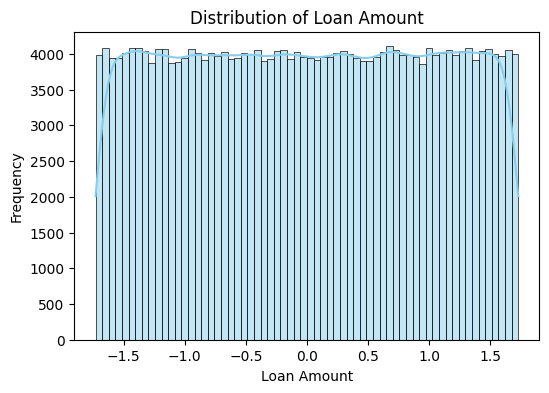

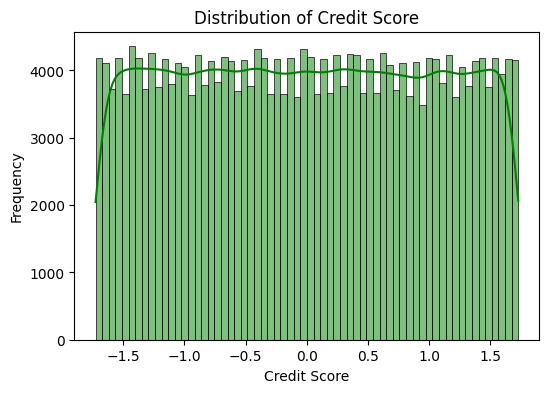

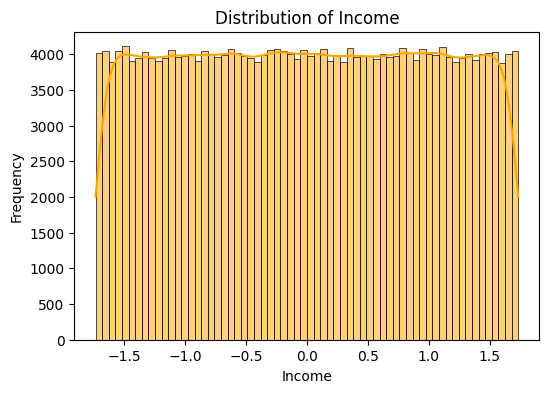

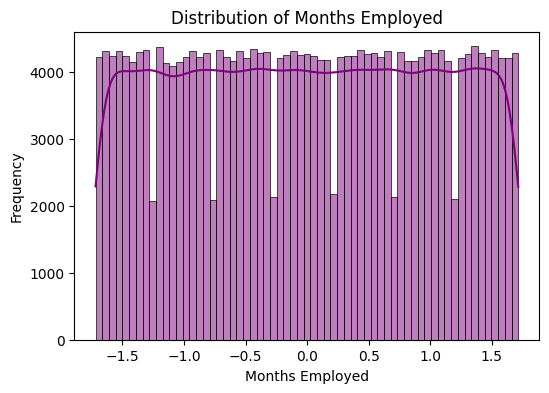

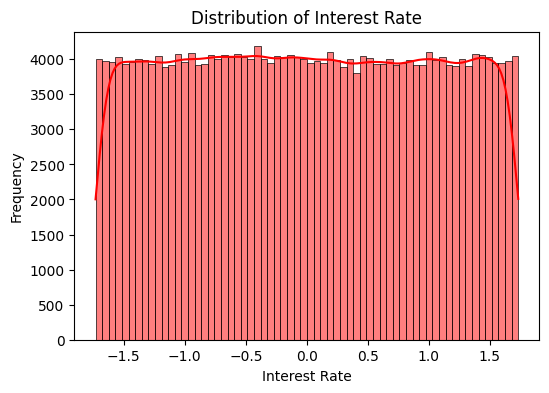

In [8]:
# Distribution of Loan Amount
plt.figure(figsize=(6, 4))
# Use df instead of df_imputed as the imputation was done directly on df
sns.histplot(df['LoanAmount'], kde=True, color='skyblue')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()

# Distribution of Credit Score
plt.figure(figsize=(6, 4))
# Use df instead of df_imputed as the imputation was done directly on df
sns.histplot(df['CreditScore'], kde=True, color='green')
plt.title('Distribution of Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

# Distribution of Income
plt.figure(figsize=(6, 4))
# Use df instead of df_imputed as the imputation was done directly on df
sns.histplot(df['Income'], kde=True, color='orange')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

# Distribution of Months Employed
plt.figure(figsize=(6, 4))
# Use df instead of df_imputed as the imputation was done directly on df
sns.histplot(df['MonthsEmployed'], kde=True, color='purple')
plt.title('Distribution of Months Employed')
plt.xlabel('Months Employed')
plt.ylabel('Frequency')
plt.show()

# Distribution of Interest Rate
plt.figure(figsize=(6, 4))
# Use df instead of df_imputed as the imputation was done directly on df
sns.histplot(df['InterestRate'], kde=True, color='red')
plt.title('Distribution of Interest Rate')
plt.xlabel('Interest Rate')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()


In [ ]:
# Comparing Loan Amount by Loan Default Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='LoanAmount', data=df_imputed)
plt.title('Loan Amount by Loan Default Status')
plt.xlabel('Loan Default (1 = Default, 0 = No Default)')
plt.ylabel('Loan Amount')
plt.show()

# Comparing Credit Score by Loan Default Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='CreditScore', data=df_imputed)
plt.title('Credit Score by Loan Default Status')
plt.xlabel('Loan Default (1 = Default, 0 = No Default)')
plt.ylabel('Credit Score')
plt.show()

# Comparing Income by Loan Default Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='Income', data=df_imputed)
plt.title('Income by Loan Default Status')
plt.xlabel('Loan Default (1 = Default, 0 = No Default)')
plt.ylabel('Income')
plt.show()

# Comparing Interest Rate by Loan Default Status
plt.figure(figsize=(6, 4))
sns.boxplot(x='Default', y='InterestRate', data=df_imputed)
plt.title('Interest Rate by Loan Default Status')
plt.xlabel('Loan Default (1 = Default, 0 = No Default)')
plt.ylabel('Interest Rate')
plt.show()


In [ ]:
# Pairplot to visualize relationships between key numerical features
sns.pairplot(df_imputed[['LoanAmount', 'CreditScore', 'Income', 'InterestRate', 'Default']], hue='Default', palette='coolwarm')
plt.suptitle('Pairwise Relationships between Key Features', y=1.02)
plt.show()


In [ ]:
# Education by Loan Default Status
plt.figure(figsize=(8, 5))
sns.countplot(x='Education', hue='Default', data=df_imputed, palette='coolwarm')
plt.title('Education Level vs Loan Default Status')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Employment Type by Loan Default Status
plt.figure(figsize=(8, 5))
sns.countplot(x='EmploymentType', hue='Default', data=df_imputed, palette='coolwarm')
plt.title('Employment Type vs Loan Default Status')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Marital Status by Loan Default Status
plt.figure(figsize=(8, 5))
sns.countplot(x='MaritalStatus', hue='Default', data=df_imputed, palette='coolwarm')
plt.title('Marital Status vs Loan Default Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Loan Purpose by Loan Default Status
plt.figure(figsize=(8, 5))
sns.countplot(x='LoanPurpose', hue='Default', data=df_imputed, palette='coolwarm')
plt.title('Loan Purpose vs Loan Default Status')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
#Correlation Matrix
# Correlation matrix to check for highly correlated features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Drop highly correlated features (if any) with correlation > 0.9
df = df.drop(columns=['highly_correlated_feature'])

In [ ]:
#Random Forest for Feature Importance (Optional)
# Feature selection using RandomForestRegressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
feature_importance = pd.Series(rf.feature_importances_, index=X_train.columns)
important_features = feature_importance[feature_importance > 0.01]  # Set threshold
print(important_features)

In [8]:
#Model Training (Regression Models)
# Initialize and train Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluate the model
print('Linear Regression Model:')
print('R2 Score:', r2_score(y_test, y_pred_lr))
print('MSE:', mean_squared_error(y_test, y_pred_lr))


In [9]:
#Ridge Regression
# Initialize and train Ridge Regression model
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluate the model
print('Ridge Regression Model:')
print('R2 Score:', r2_score(y_test, y_pred_ridge))
print('MSE:', mean_squared_error(y_test, y_pred_ridge))


In [ ]:
#Lasso Regression
# Initialize and train Lasso Regression model
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluate the model
print('Lasso Regression Model:')
print('R2 Score:', r2_score(y_test, y_pred_lasso))
print('MSE:', mean_squared_error(y_test, y_pred_lasso))


In [ ]:
#Random Forest Regressor
# Initialize and train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print('Random Forest Regressor Model:')
print('R2 Score:', r2_score(y_test, y_pred_rf))
print('MSE:', mean_squared_error(y_test, y_pred_rf))


In [10]:
#Decision Tree Regressor
# Initialize and train Decision Tree model
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
print('Decision Tree Regressor Model:')
print('R2 Score:', r2_score(y_test, y_pred_dt))
print('MSE:', mean_squared_error(y_test, y_pred_dt))


NameError: name 'DecisionTreeRegressor' is not defined

In [ ]:
# Model Comparison
# Create a dictionary of models and their names
models = {
    'Linear Regression': lr,
    'Ridge Regression': ridge,
    'Lasso Regression': lasso,
    'Random Forest Regressor': rf,
    'Decision Tree Regressor': dt
}

# Compare the R2 Scores of each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{model_name} R2 Score: {r2_score(y_test, y_pred):.4f}')


In [ ]:
# Summarize the model performance
print("Conclusion:")
best_model = max(models, key=lambda model_name: r2_score(y_test, models[model_name].predict(X_test)))
print(f'The best performing model is: {best_model}')
